# Author : Nishant Singh Tomar

## Task 1 : Prediction the percentage of marks that a student is expected to score based upon                    the number of hours they studied.

## GRIP @ The Sparks Foundation
## FEB22

In [59]:
# Importing the required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

## Step 1 - Reading the data from source

In [12]:
# Reading data from link
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
print("Data import successful")
#Show Data head only 5
student_data.head(5)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Step 2 - Input data Visualization

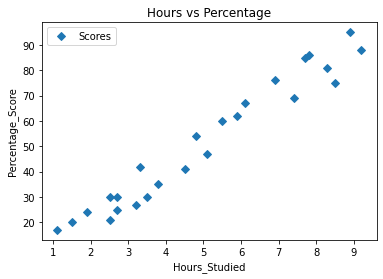

In [14]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='D')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours_Studied')  
plt.ylabel('Percentage_Score')  
plt.show()

We can see in graph positive linear relation between the number of hours studied and percentage of score.

## Step 3 - Data Preprocessing

In [21]:
#division the data into "attributes" (inputs) and "labels" (outputs).
x = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

## Step 4 - Model Training

In [26]:
#Splitting the data into training and testing sets.
#Traning the algorithm
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(x_train.reshape(-1,1), y_train)
print("Training complete.")
#our model is trained now

Training complete.


## Step 5 - Plotting the Line of regression 

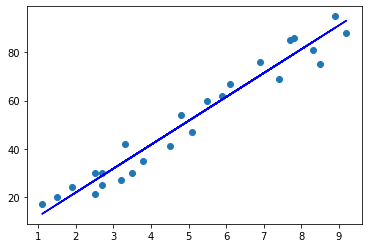

In [27]:
# its time to visualize the best-fit line of regression.
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='blue');
plt.show()

## Step 6 - Making Predictions

In [32]:
#Now that we have trained our algorithm, it's time to test the model by making some predictions.
#For this we will use our test-set data
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# Model Prediction 
y_pred = regressor.predict(x_test)

## Step 7 - Comparing Actual result to the Predicted Model result


In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [39]:
#Estimating training and test score
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


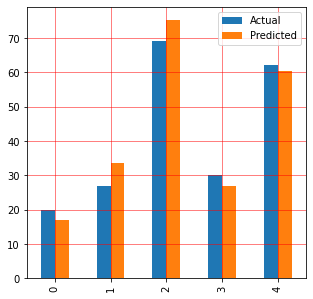

In [44]:
# Plotting the Bar graph
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [57]:
# Testing the model with our own data
hours = 8.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {0:.4f}".format(own_pred[0]))

No of Hours = 8.25
Predicted Score = 83.7811


## Step 8 - Evaluating the model

In [60]:
#The final step is to evaluate the performance of algorithm.
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

### Thank You